In [2]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'HLC Results'
files = [ f for f in os.listdir(file_path) if f.endswith('.csv')]

# Read arrays
Vs_array = np.genfromtxt('model_arrays_HLC.csv', delimiter=',', skip_header=1)

In [5]:
# Reorder the array given the order of files
import pickle

with open('TF/TTF_data_1000.pt', 'rb') as f:
    data = pickle.load(f)

TF_values = np.array(data)

with open('TF/Vs_values_1000.pt', 'rb') as f:
    data = pickle.load(f)

Vs_values = np.array(data)

In [6]:
freq = np.genfromtxt('TF/TTF_freq.csv', delimiter=',')

In [7]:
import re

# Extract the number on the files list
def extract_number(file):
    return int(re.findall(r'\d+', file)[0])

order_files = [extract_number(f) for f in files]
#Vs_array = Vs_array[order_files]

In [9]:
def text_plot(Vs):
    # Eliminate the nan at the end of the array
    Vs = Vs[~np.isnan(Vs)]
    vs_soil = Vs[0]
    h_soil = len(Vs[:-1]) * 5
    vs_bedrock = Vs[-1]
    return f"Vs soil: {vs_soil:.0f} m/s\nVs bedrock: {vs_bedrock:.0f} m/s\nh soil: {h_soil} m\nfreq_calc: {vs_soil/(4*(h_soil+5)):.2f} Hz"

def freq_calc(Vs):
    # Eliminate the nan at the end of the array
    Vs = Vs[~np.isnan(Vs)]
    vs_soil = Vs[0]
    h_soil = len(Vs[:-1]) * 5
    return vs_soil/(4*(h_soil+5))


Index: 160


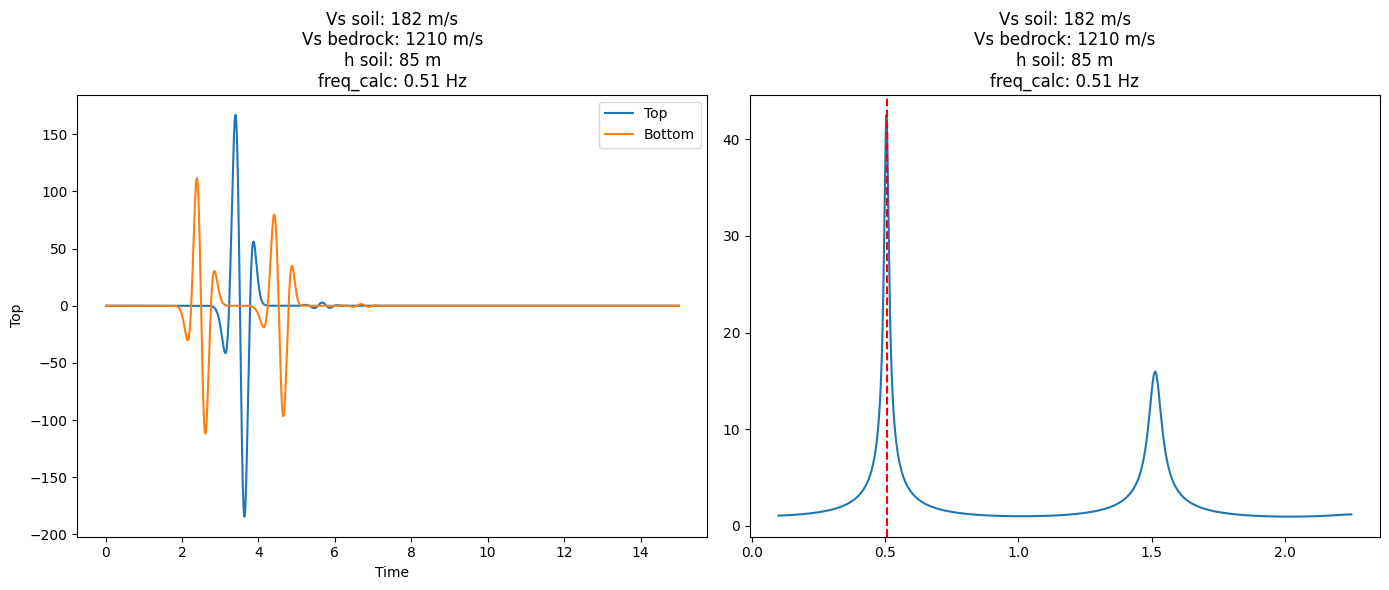

In [48]:
idx = np.random.randint(0, Vs_values.shape[0])
#idx = 613
print(f"Index: {idx}")

df = pd.read_csv(os.path.join(file_path, files[idx]))
df.columns = ["Time", "Bottom", "Top"]

freq_calc_idx = freq_calc(Vs_values[idx])
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the first subplot
sns.lineplot(x="Time", y="Top", data=df, label="Top", ax=axes[0])
sns.lineplot(x="Time", y="Bottom", data=df, label="Bottom", ax=axes[0])
axes[0].set_title(text_plot(Vs_values[idx]))

# Plot the second subplot
sns.lineplot(x=freq, y=TF_values[idx], ax=axes[1])
axes[1].set_title(text_plot(Vs_values[idx]))
# Put a vertical line at freq_calc 
axes[1].axvline(freq_calc_idx, color='r', linestyle='--')

# Adjust layout
plt.tight_layout()
plt.show()


In [78]:
rho = 2000
nu = 0.3
Vs = Vs_array[idx][~np.isnan(Vs_array[idx])]
G = rho * Vs** 2
sigmax = -2 * rho*Vs[-1]
print(len(Vs), Vs[-1], sigmax)

11 1096.6164185070274 -4386465.67402811


<Axes: xlabel='Time', ylabel='Top'>

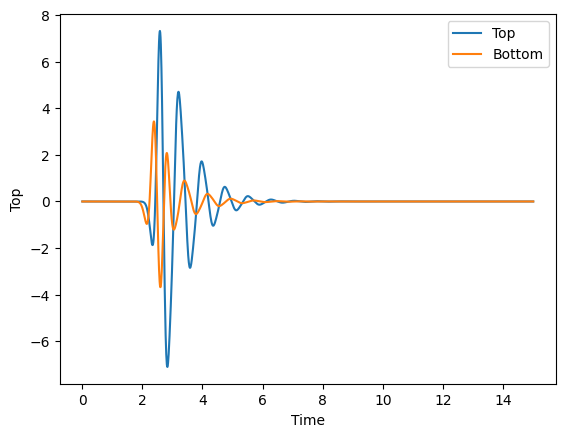

In [79]:
# Run FLAC results

# Read Data.dat file
data = pd.read_csv("Check_model/Data.dat", sep='\\s+', header=None, skiprows=2)
data.columns = ["Time", "Bottom", "Bottom_Soil", "Top"]

# Plot the results
sns.lineplot(x="Time", y="Top", data=data, label="Top")
sns.lineplot(x="Time", y="Bottom", data=data, label="Bottom")
#sns.lineplot(x="Time", y="Bottom_Soil", data=data, label="Bottom_Soil")